### Install and Import Necessary Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm

# Load Dubai font
font_path = r"C:\Windows\Fonts\Dubai-Regular.ttf"
dubai_font = fm.FontProperties(fname=font_path)

#### Import and Prepare Data

In [2]:
# Load dataset
file_path = r'C:\Users\moein\anaconda3\06_World Happiness Report 2024\02 Data\Prepared Data\Cleaned_World_Happiness_2024.csv'
df = pd.read_csv(file_path)

# Preview the dataset
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


### Preprocess for Clustering

In [3]:
# Keep only numeric columns for k-means
df_numeric = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Convert back to DataFrame for readability
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

### Use the Elbow Technique

C:\Users\moein\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\moein\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\moein\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\moein\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\moein\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

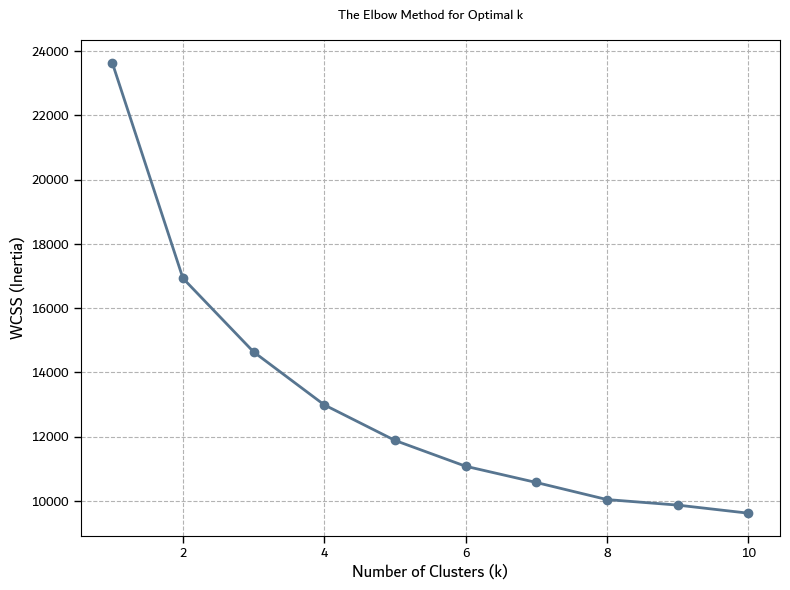

In [4]:
# Calculate WCSS for k = 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='#577590', linewidth=2)

# Style settings
plt.title('The Elbow Method for Optimal k', fontsize=16, fontproperties=dubai_font, pad=15)
plt.xlabel('Number of Clusters (k)', fontsize=12, fontproperties=dubai_font)
plt.ylabel('WCSS (Inertia)', fontsize=12, fontproperties=dubai_font)
plt.xticks(fontproperties=dubai_font)
plt.yticks(fontproperties=dubai_font)
plt.grid(True, linestyle='--', color='0.7')

# Border styling
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('black')
ax.tick_params(axis='both', direction='out', length=5, width=1, colors='black')

# Save figure
output_path = r"C:\Users\moein\anaconda3\06_World Happiness Report 2024\04 Analysis\6.5_Elbow Technique.jpg"
plt.tight_layout()
plt.savefig(output_path, dpi=600, format='jpg')
plt.show()

#### 🔹 Chosen Number of Clusters: 4
I chose 4 clusters based on the elbow method. The curve shows a distinct bend at k=4, indicating that this is the optimal number of clusters before diminishing returns set in. Using 4 clusters allows the model to identify meaningful groupings while avoiding overfitting.

### Run the k-Means Algorithm and Assign Clusters

In [5]:
# Run k-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Attach cluster labels to the original dataframe
df['Cluster'] = clusters

C:\Users\moein\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


### Visualizations

C:\Users\moein\AppData\Local\Temp\ipykernel_21260\4181266279.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.scatterplot(


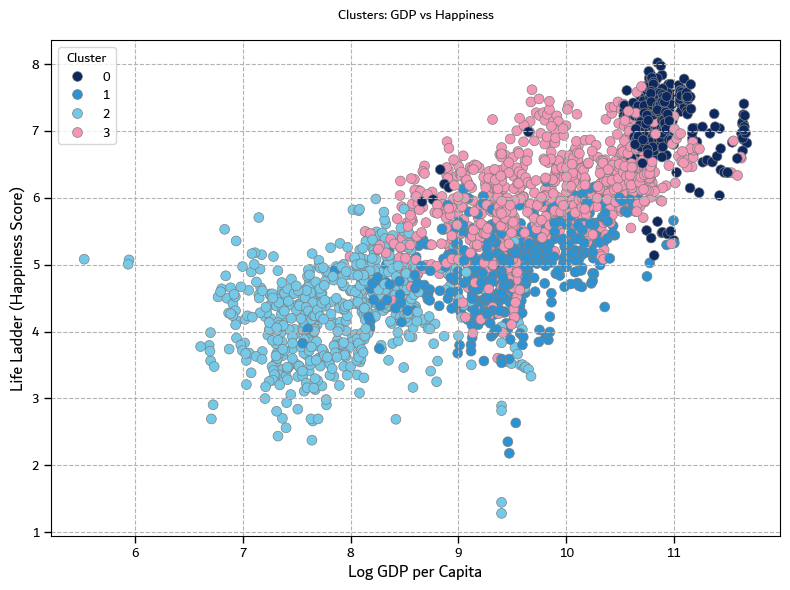

In [6]:
# Define a custom color palette for clusters
cluster_palette = ['#0c285e', '#2d92d1', '#74c9e8', '#f497b6', '#87153b']

# Plot 1: GDP vs Happiness
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    data=df,
    x='Log GDP per capita',
    y='Life Ladder',
    hue='Cluster',
    palette=cluster_palette,
    s=50,
    edgecolor='0.5',
    linewidth=0.5
)

# Titles and labels
plt.title('Clusters: GDP vs Happiness', fontsize=16, fontproperties=dubai_font, pad=15)
plt.xlabel('Log GDP per Capita', fontsize=12, fontproperties=dubai_font)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12, fontproperties=dubai_font)
plt.xticks(fontproperties=dubai_font)
plt.yticks(fontproperties=dubai_font)

# Grid and border styling
ax.grid(True, linestyle='--', color='0.7')
for spine in ax.spines.values():
    spine.set_color('black')
ax.tick_params(axis='both', direction='out', length=5, width=1, colors='black')

# Legend font
plt.legend(title='Cluster', prop=dubai_font, title_fontproperties=dubai_font)

# Save figure
output_path = r"C:\Users\moein\anaconda3\06_World Happiness Report 2024\04 Analysis\6.5_Clusters GDP vs Life Ladder.jpg"
plt.tight_layout()
plt.savefig(output_path, dpi=600, format='jpg')
plt.show()

C:\Users\moein\AppData\Local\Temp\ipykernel_19984\2130041042.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.scatterplot(


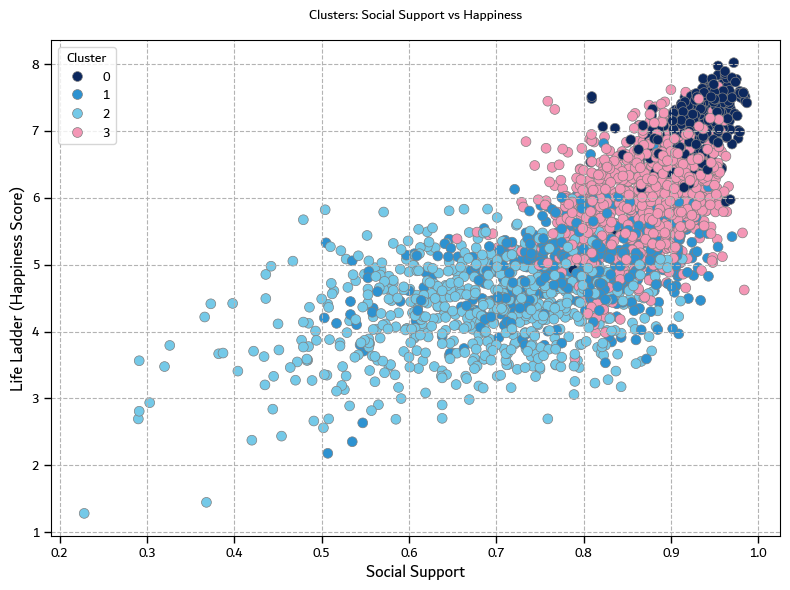

In [10]:
# Plot 2: Social Support vs Happiness
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    data=df,
    x='Social support',
    y='Life Ladder',
    hue='Cluster',
    palette=cluster_palette,  # Same palette from previous plot
    s=50,
    edgecolor='0.5',
    linewidth=0.5
)

# Title and labels
plt.title('Clusters: Social Support vs Happiness', fontsize=16, fontproperties=dubai_font, pad=15)
plt.xlabel('Social Support', fontsize=12, fontproperties=dubai_font)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12, fontproperties=dubai_font)
plt.xticks(fontproperties=dubai_font)
plt.yticks(fontproperties=dubai_font)

# Grid and axis styling
ax.grid(True, linestyle='--', color='0.7')
for spine in ax.spines.values():
    spine.set_color('black')
ax.tick_params(axis='both', direction='out', length=5, width=1, colors='black')

# Legend styling
plt.legend(title='Cluster', prop=dubai_font, title_fontproperties=dubai_font)

# Save plot
output_path = r"C:\Users\moein\anaconda3\06_World Happiness Report 2024\04 Analysis\6.5_Clusters Social Support vs Life Ladder.jpg"
plt.tight_layout()
plt.savefig(output_path, dpi=600, format='jpg')
plt.show()

C:\Users\moein\AppData\Local\Temp\ipykernel_19984\2056292131.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.scatterplot(


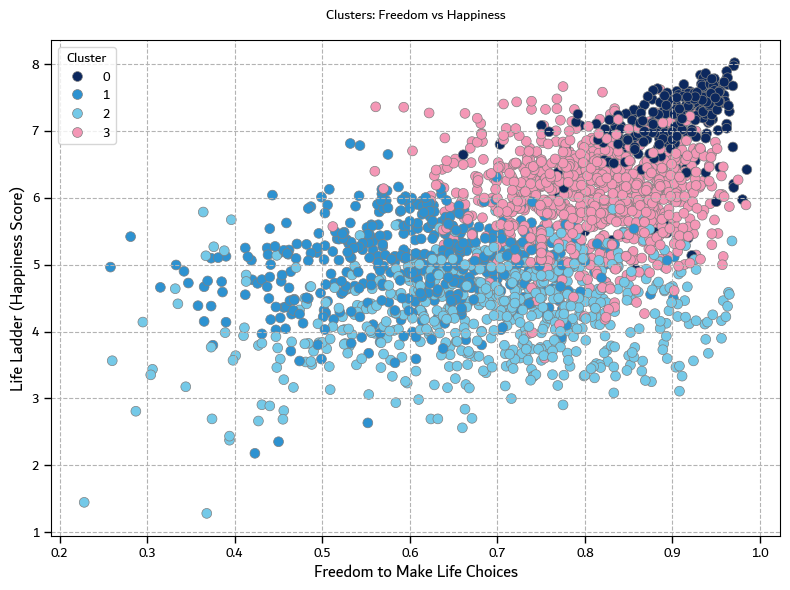

In [11]:
# Plot 3: Freedom vs Happiness
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    data=df,
    x='Freedom to make life choices',
    y='Life Ladder',
    hue='Cluster',
    palette=cluster_palette,  # Use your defined cluster color palette
    s=50,
    edgecolor='0.5',
    linewidth=0.5
)

# Titles and labels
plt.title('Clusters: Freedom vs Happiness', fontsize=16, fontproperties=dubai_font, pad=15)
plt.xlabel('Freedom to Make Life Choices', fontsize=12, fontproperties=dubai_font)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12, fontproperties=dubai_font)
plt.xticks(fontproperties=dubai_font)
plt.yticks(fontproperties=dubai_font)

# Grid and axis styling
ax.grid(True, linestyle='--', color='0.7')
for spine in ax.spines.values():
    spine.set_color('black')
ax.tick_params(axis='both', direction='out', length=5, width=1, colors='black')

# Legend styling
plt.legend(title='Cluster', prop=dubai_font, title_fontproperties=dubai_font)

# Save plot
output_path = r"C:\Users\moein\anaconda3\06_World Happiness Report 2024\04 Analysis\6.5_Clusters Freedom vs Life Ladder.jpg"
plt.tight_layout()
plt.savefig(output_path, dpi=600, format='jpg')
plt.show()

### Cluster Analysis Interpretation

The clusters largely make intuitive sense:

- **Cluster 0 (Blue):** Represents countries with the highest GDP per capita, social support, and life satisfaction. These could be affluent, high-income nations with strong governance and social infrastructure.
- **Cluster 2 (Green):** Contains countries with low GDP, low social support, and low life satisfaction. These may be low-income or conflict-affected countries.
- **Cluster 1 & 3 (Orange/Red):** Occupy the middle ground, varying by combinations of GDP, freedom, and support. Their placement might reflect transitional economies or culturally diverse perceptions of happiness.

The clusters validate that **economic wealth**, **freedom**, and **social support** are strong indicators of self-reported life satisfaction. However, overlap between clusters also suggests that other latent variables (e.g., culture, governance quality, inequality) may influence happiness and should be explored further.


### Group Data by Cluster

In [10]:
# Group the data by the cluster column 
cluster_stats = df.groupby('Cluster').mean(numeric_only=True)

# Get full descriptive statistics per cluster
cluster_description = df.groupby('Cluster').describe()

# Display the grouped summary
print(cluster_stats)

                year  Life Ladder  Log GDP per capita  Social support  \
Cluster                                                                 
0        2014.794788     7.115114           10.869672        0.928703   
1        2013.652344     5.018861            9.540087        0.793298   
2        2014.665094     4.297881            7.950090        0.679107   
3        2015.449339     6.024468            9.838824        0.869325   

         Healthy life expectancy at birth  Freedom to make life choices  \
Cluster                                                                   
0                               70.200760                      0.902519   
1                               64.638700                      0.616065   
2                               54.802799                      0.699900   
3                               66.428736                      0.809781   

         Generosity  Perceptions of corruption  Positive affect  \
Cluster                                    

### 🔹 Applications of Clustering Results in Future Analytics

The clustering results reveal meaningful groupings of countries based on socio-economic, political, and well-being indicators. These insights can be valuable for the following future steps in an analytics pipeline:

1. **Targeted Policy Recommendations**
   - Clusters can represent different country profiles (e.g., low GDP & happiness vs. high GDP & happiness).
   - Policymakers or international organizations can tailor strategies for each cluster rather than using a one-size-fits-all approach.

2. **Segment-Specific Modeling**
   - In supervised machine learning models (e.g., predicting future Life Ladder scores), cluster labels can be used as features to improve model accuracy.
   - You can also build separate models for each cluster if the relationships between variables differ significantly across groups.

3. **Anomaly Detection**
   - Outliers within clusters (e.g., a country with high GDP but low happiness) can be flagged for further qualitative investigation.
   - This helps identify nations that deviate from expected trends and may need closer examination.

4. **Dynamic Trend Monitoring**
   - Track how countries move between clusters over time to monitor progress or regression.
   - This could feed into dashboards or interactive visualizations for stakeholders.

5. **Data Reduction & Storytelling**
   - Instead of analyzing 10+ variables across 100+ countries, cluster labels simplify communication.
   - Each cluster tells a "story" — such as “prosperous and happy,” “economically strained but free,” etc.

In short, clustering transforms raw indicators into interpretable, actionable insights that can inform policy, improve modeling, guide monitoring, and support strategic storytelling in global well-being analytics.

In [11]:
df.to_csv("WHR24_clusters.csv", index=False)